In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
 df.rename(columns={
     'race/ethnicity':'race',
'parental level of education':'parental_education',
'test preparation course':'test_preparation_course',
'math score':'math_score',
'reading score':'reading_score',
'writing score':'writing_score'
},inplace=True
)



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race                     1000 non-null   object
 2   parental_education       1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
reading_good=df[df['reading_score']==100]['reading_score'].count() 
writing_good=df[df['writing_score']==100]['writing_score'].count() 
math_good=df[df['math_score']==100]['math_score'].count() 
print(f'Number of student with full  marks  in reading is :{reading_good}')
print(f'Number of student with full  marks  in writing is :{writing_good}')
print(f'Number of student with full  marks  in math is :{math_good}')

Number of student with full  marks  in reading is :17
Number of student with full  marks  in writing is :14
Number of student with full  marks  in math is :7


In [11]:
pass_grad=50

df['pass_math']='yes'
filt=(df['math_score']<pass_grad)
df.loc[filt,'pass_math']='no'
df[['math_score','pass_math']].head()

df['pass_reading']='yes'
filt=(df['reading_score']<pass_grad)
df.loc[filt,'pass_reading']='no'
df[['reading_score','pass_reading']].head()

df['pass_writing']='yes'
filt=(df['writing_score']<pass_grad)
df.loc[filt,'pass_writing']='no'
df[['writing_score','pass_writing']].head()


,writing_score,pass_writing
0,74,yes
1,88,yes
2,93,yes
3,44,no
4,75,yes


In [12]:
pass_math_count=df.groupby('pass_math')['pass_math'].count()
pass_math_count

pass_math
no     135
yes    865
Name: pass_math, dtype: int64

In [13]:
pass_reading_count=df.groupby('pass_reading')['pass_reading'].count()
pass_reading_count

pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64

In [14]:
pass_writing_count=df.groupby('pass_writing')['pass_writing'].count()
pass_writing_count

pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


average score in math :66.089
average score in reading :69.169
average score in writing :68.054



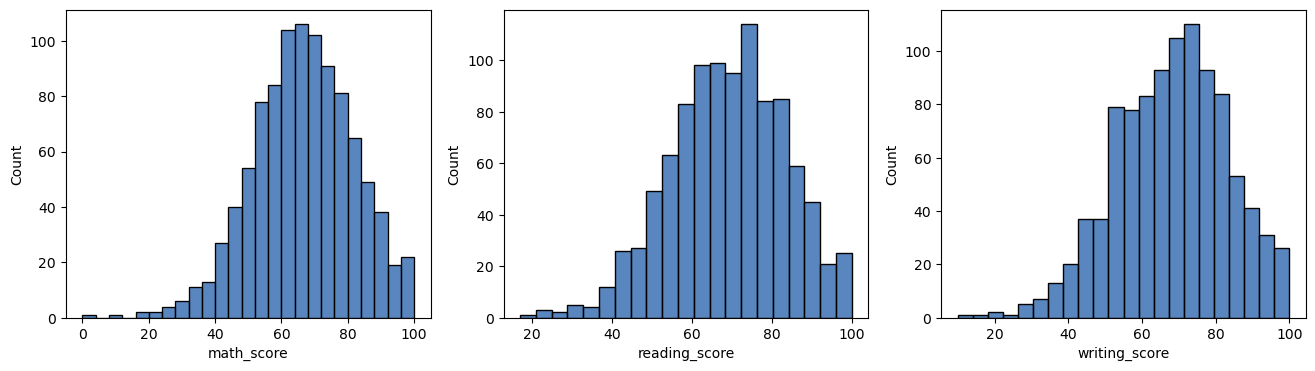

In [15]:
fig,ax=plt.subplots(1,3,figsize=(16,4))

#ax
sns.histplot(x='math_score',data=df,ax=ax[0],color='#225ea8')
sns.histplot(x='reading_score',data=df,ax=ax[1],color='#225ea8')
sns.histplot(x='writing_score',data=df,ax=ax[2],color='#225ea8')

math_mean=df['math_score'].mean()
reading_mean=df['reading_score'].mean()
writing_mean=df['writing_score'].mean()
print(f'average score in math :{math_mean}\naverage score in reading :{reading_mean}\naverage score in writing :{writing_mean}\n')
plt.show()

pass_math
no     135
yes    865
Name: pass_math, dtype: int64
pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64
pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64


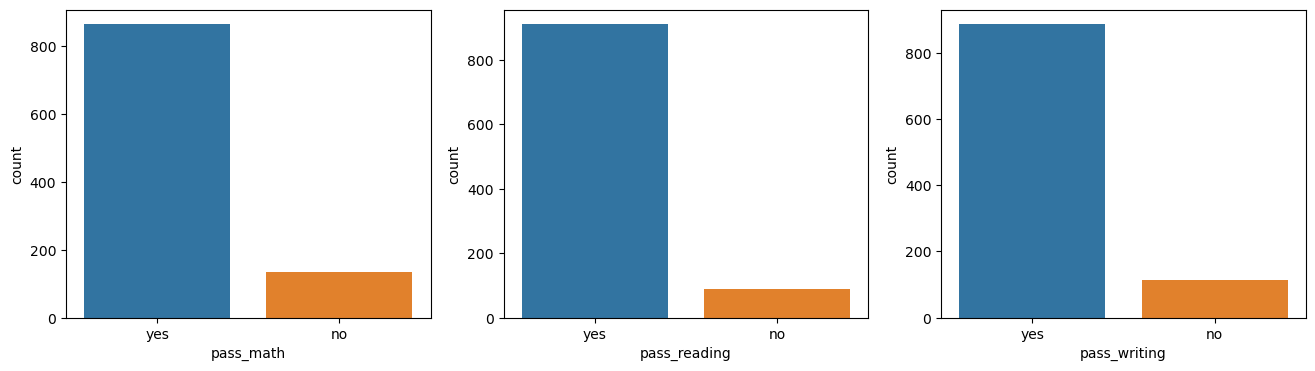

In [16]:
fig,ax=plt.subplots(1,3,figsize=(16,4))

#ax
sns.countplot(x='pass_math',data=df,ax=ax[0])
sns.countplot(x='pass_reading',data=df,ax=ax[1])
sns.countplot(x='pass_writing',data=df,ax=ax[2])

pass_math_count=df.groupby('pass_math')['pass_math'].count()
print(pass_math_count)

pass_reading_count=df.groupby('pass_reading')['pass_reading'].count()
print(pass_reading_count)

pass_writing_count=df.groupby('pass_writing')['pass_writing'].count()
print(pass_writing_count)

plt.show()


In [17]:
df['parental_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

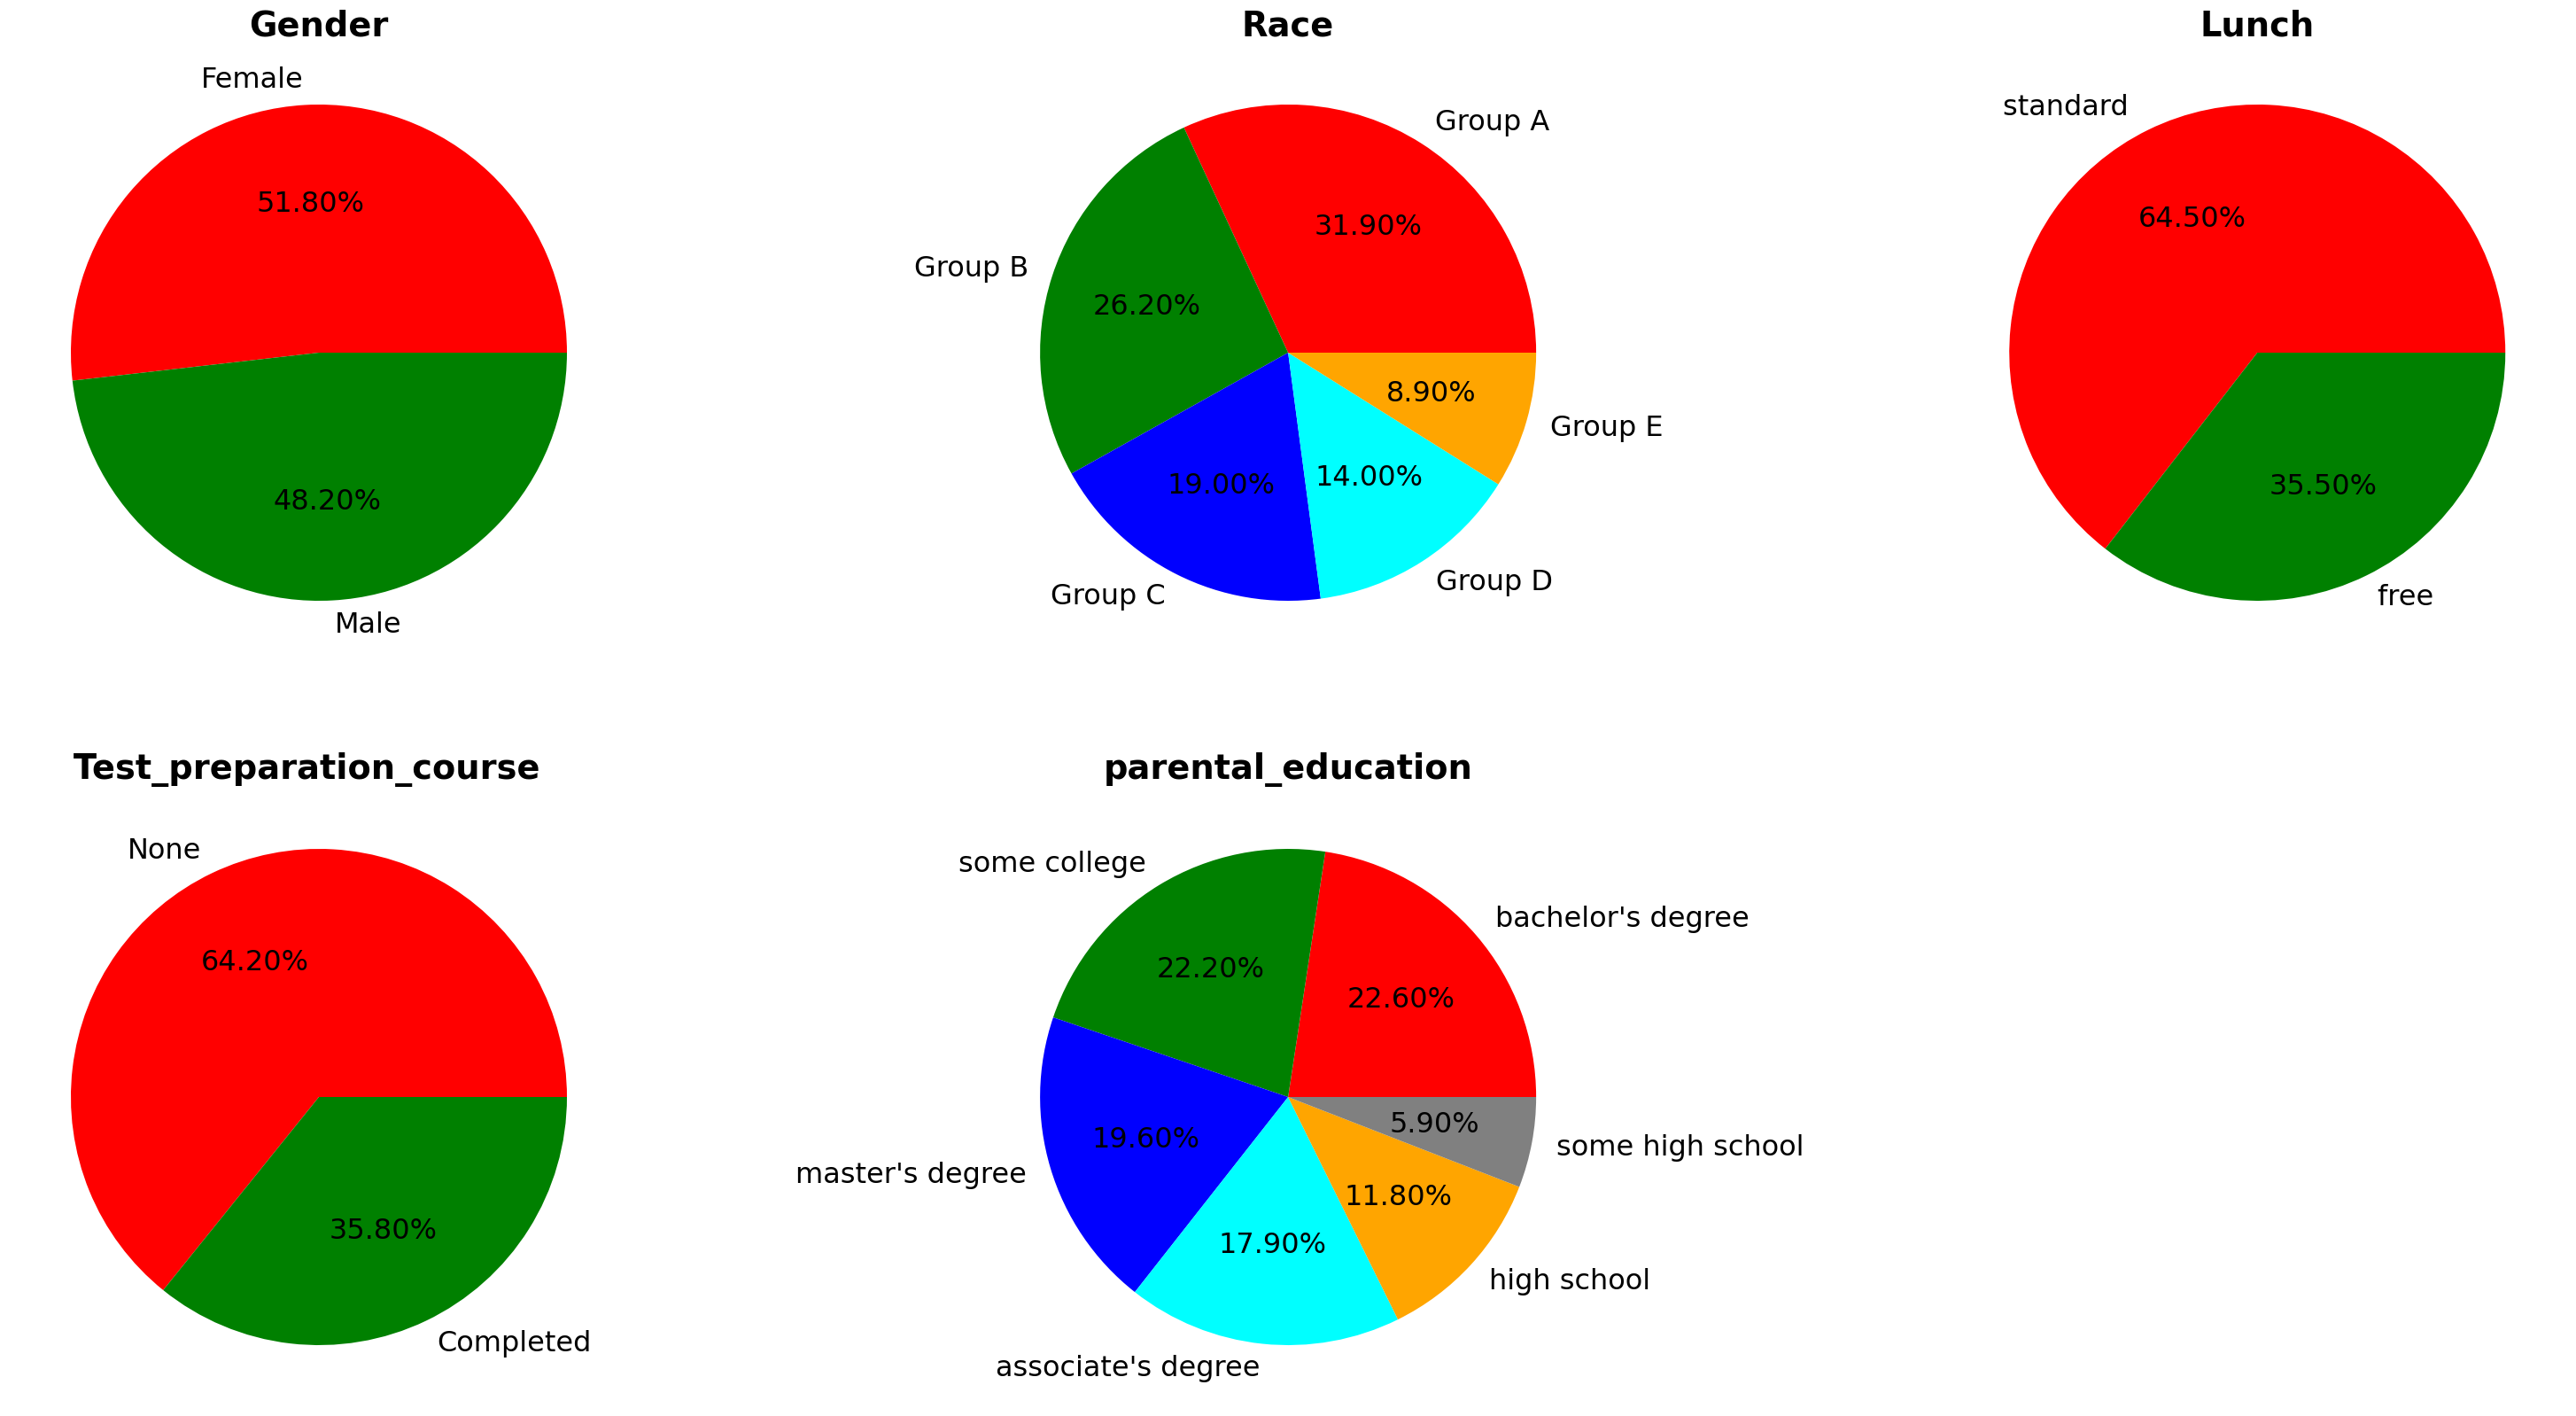

In [18]:
plt.rcParams['figure.figsize']=(40,20)
plt.rcParams['font.size']=23

plt.subplot(2,3,1)
size=df['gender'].value_counts()
# print(size)
labels='Female','Male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Gender',fontweight='bold')


plt.subplot(2,3,2)
size=df['race'].value_counts()
# print(size)
labels='Group A','Group B','Group C','Group D','Group E'
color=['red','green','blue','cyan','orange']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Race',fontweight='bold')


plt.subplot(2,3,3)
size=df['lunch'].value_counts()
# print(size)
labels='standard ','free '
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Lunch',fontweight='bold')


plt.subplot(2,3,4)
size=df['test_preparation_course'].value_counts()
# print(size)
labels='None','Completed'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Test_preparation_course  ',fontweight='bold')



plt.subplot(2,3,5)
size=df['parental_education'].value_counts()
# print(size)
labels="bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color=['red','green','blue','cyan','orange','grey']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('parental_education',fontweight='bold')

plt.show()


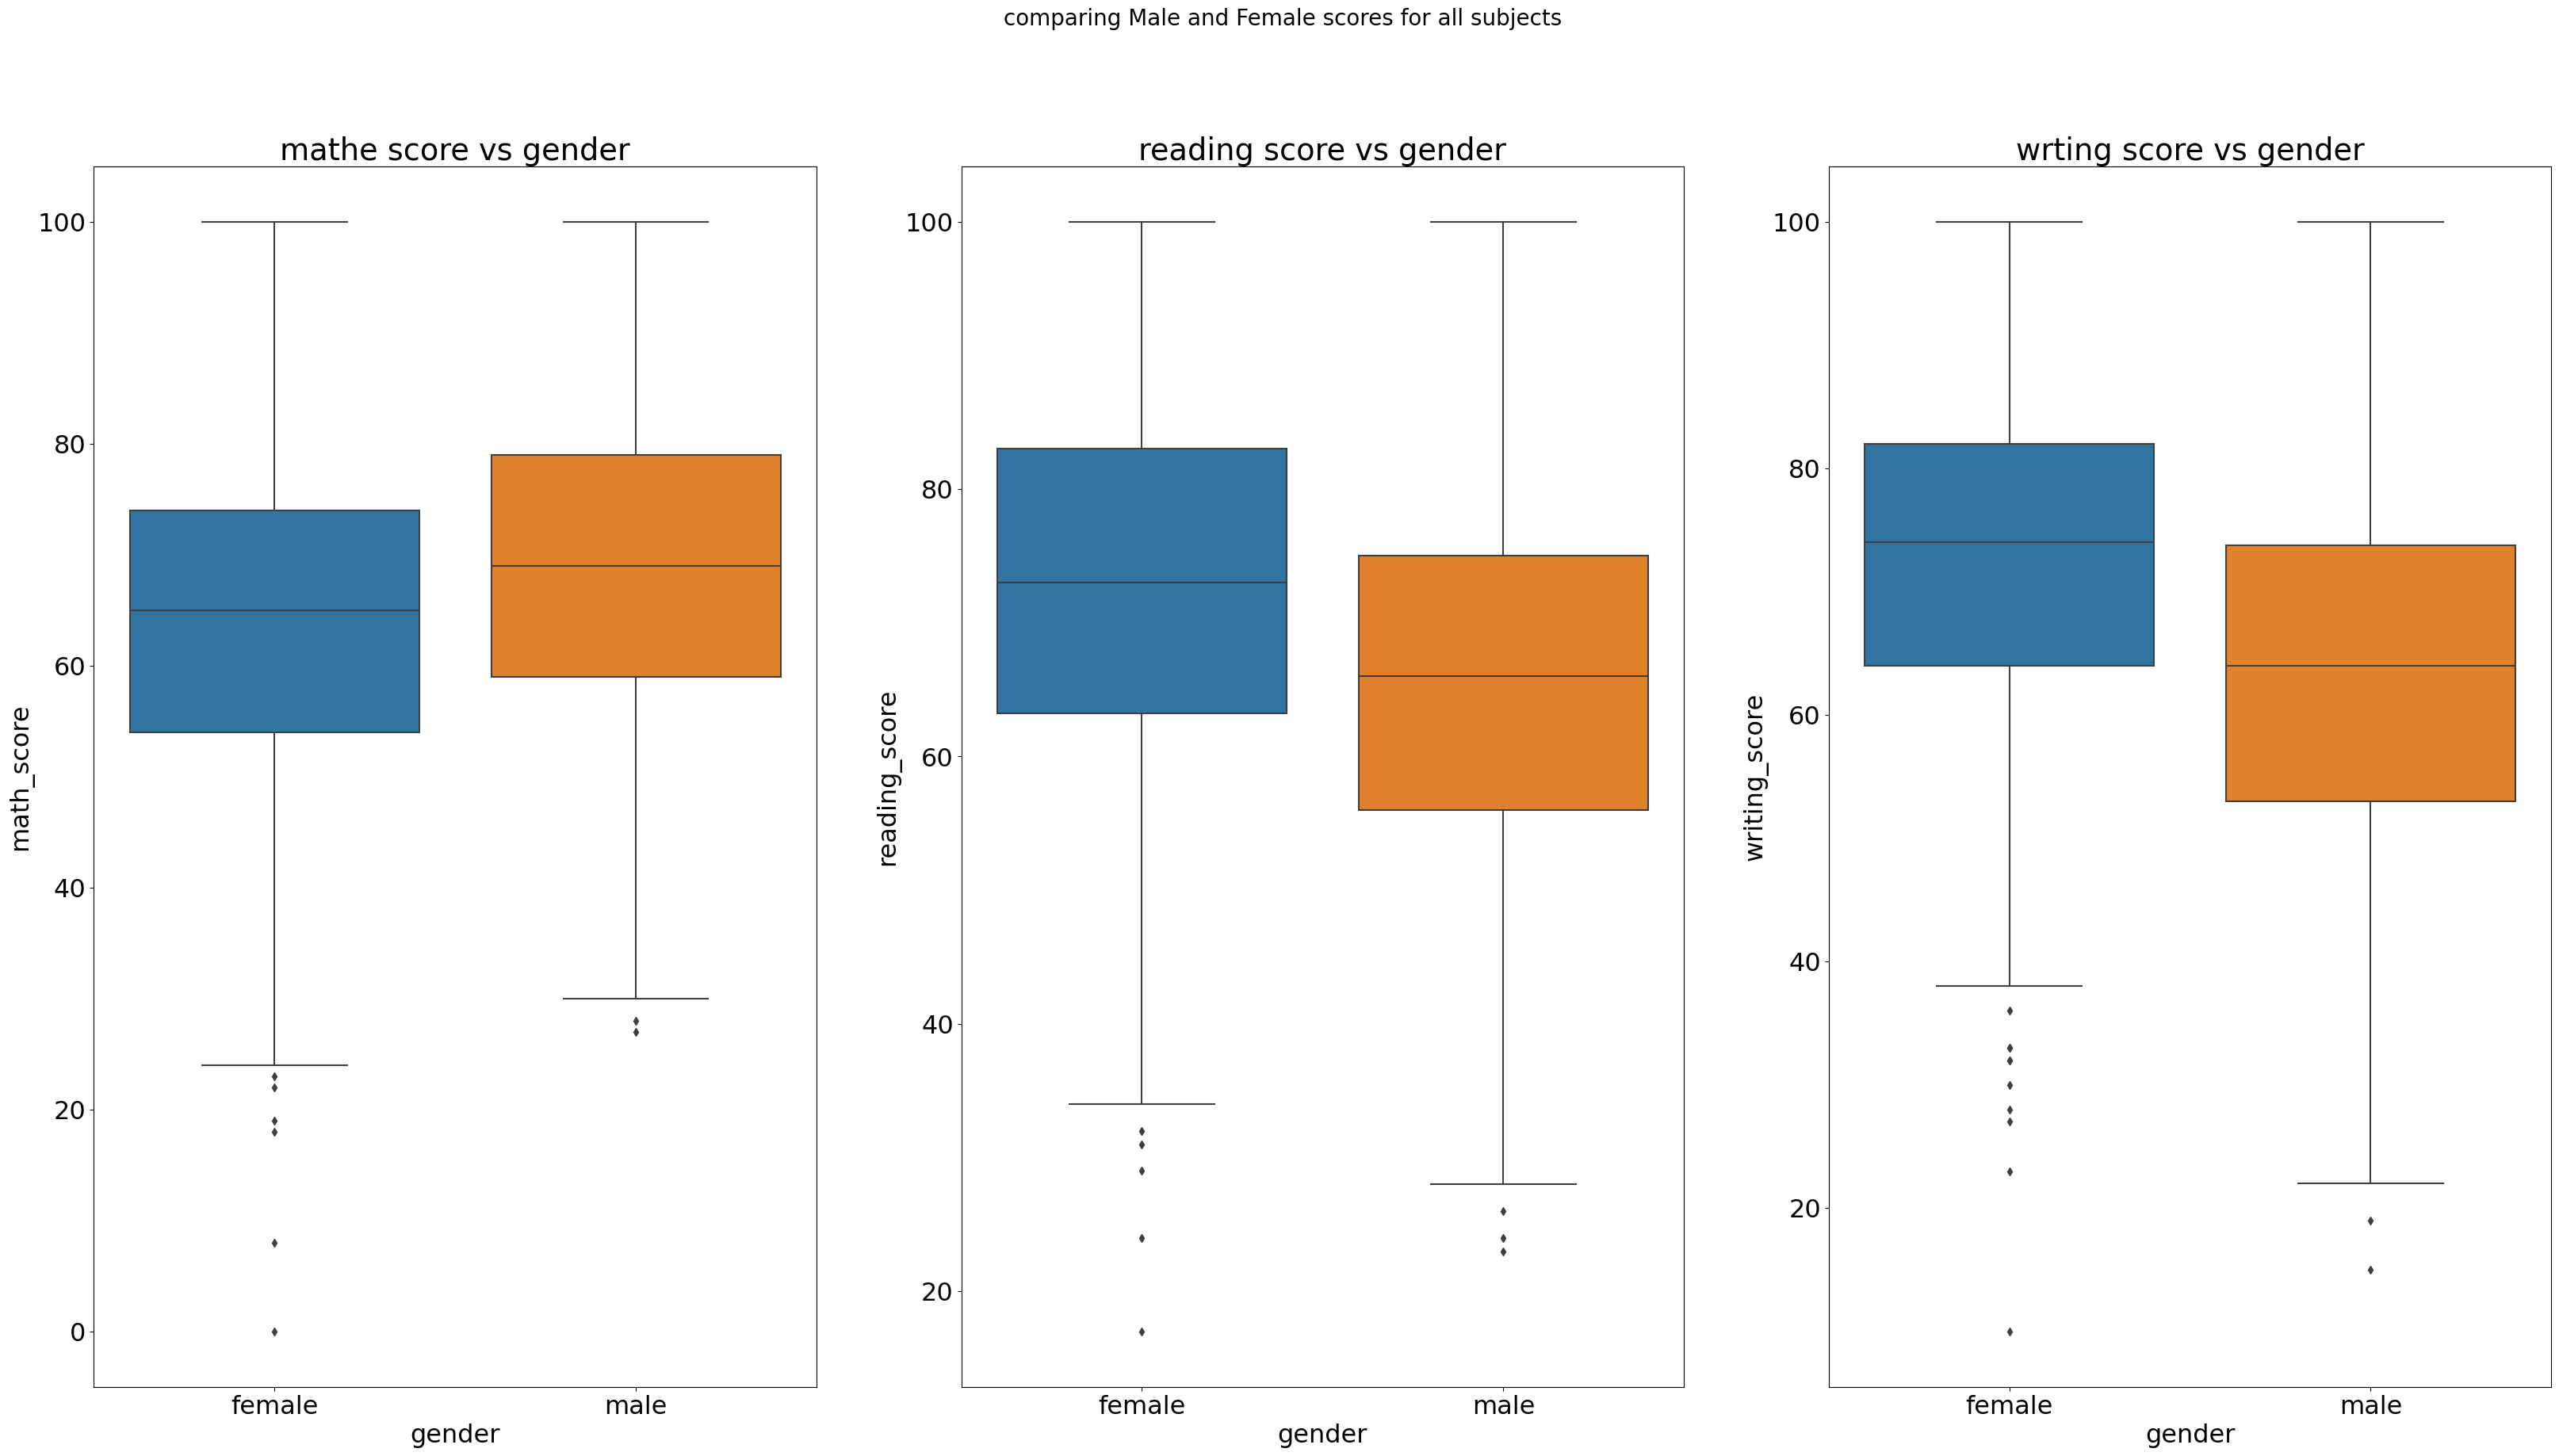

In [21]:
fig,ax=plt.subplots(1,3)
fig.suptitle("comparing Male and Female scores for all subjects",fontsize=20)

#ax
sns.boxplot(x='gender',y='math_score',data=df,ax=ax[0])
ax[0].title.set_text('mathe score vs gender')

sns.boxplot(x='gender',y='reading_score',data=df,ax=ax[1])
ax[1].title.set_text('reading score vs gender')

sns.boxplot(x='gender',y='writing_score',data=df,ax=ax[2])
ax[2].title.set_text('wrting score vs gender')


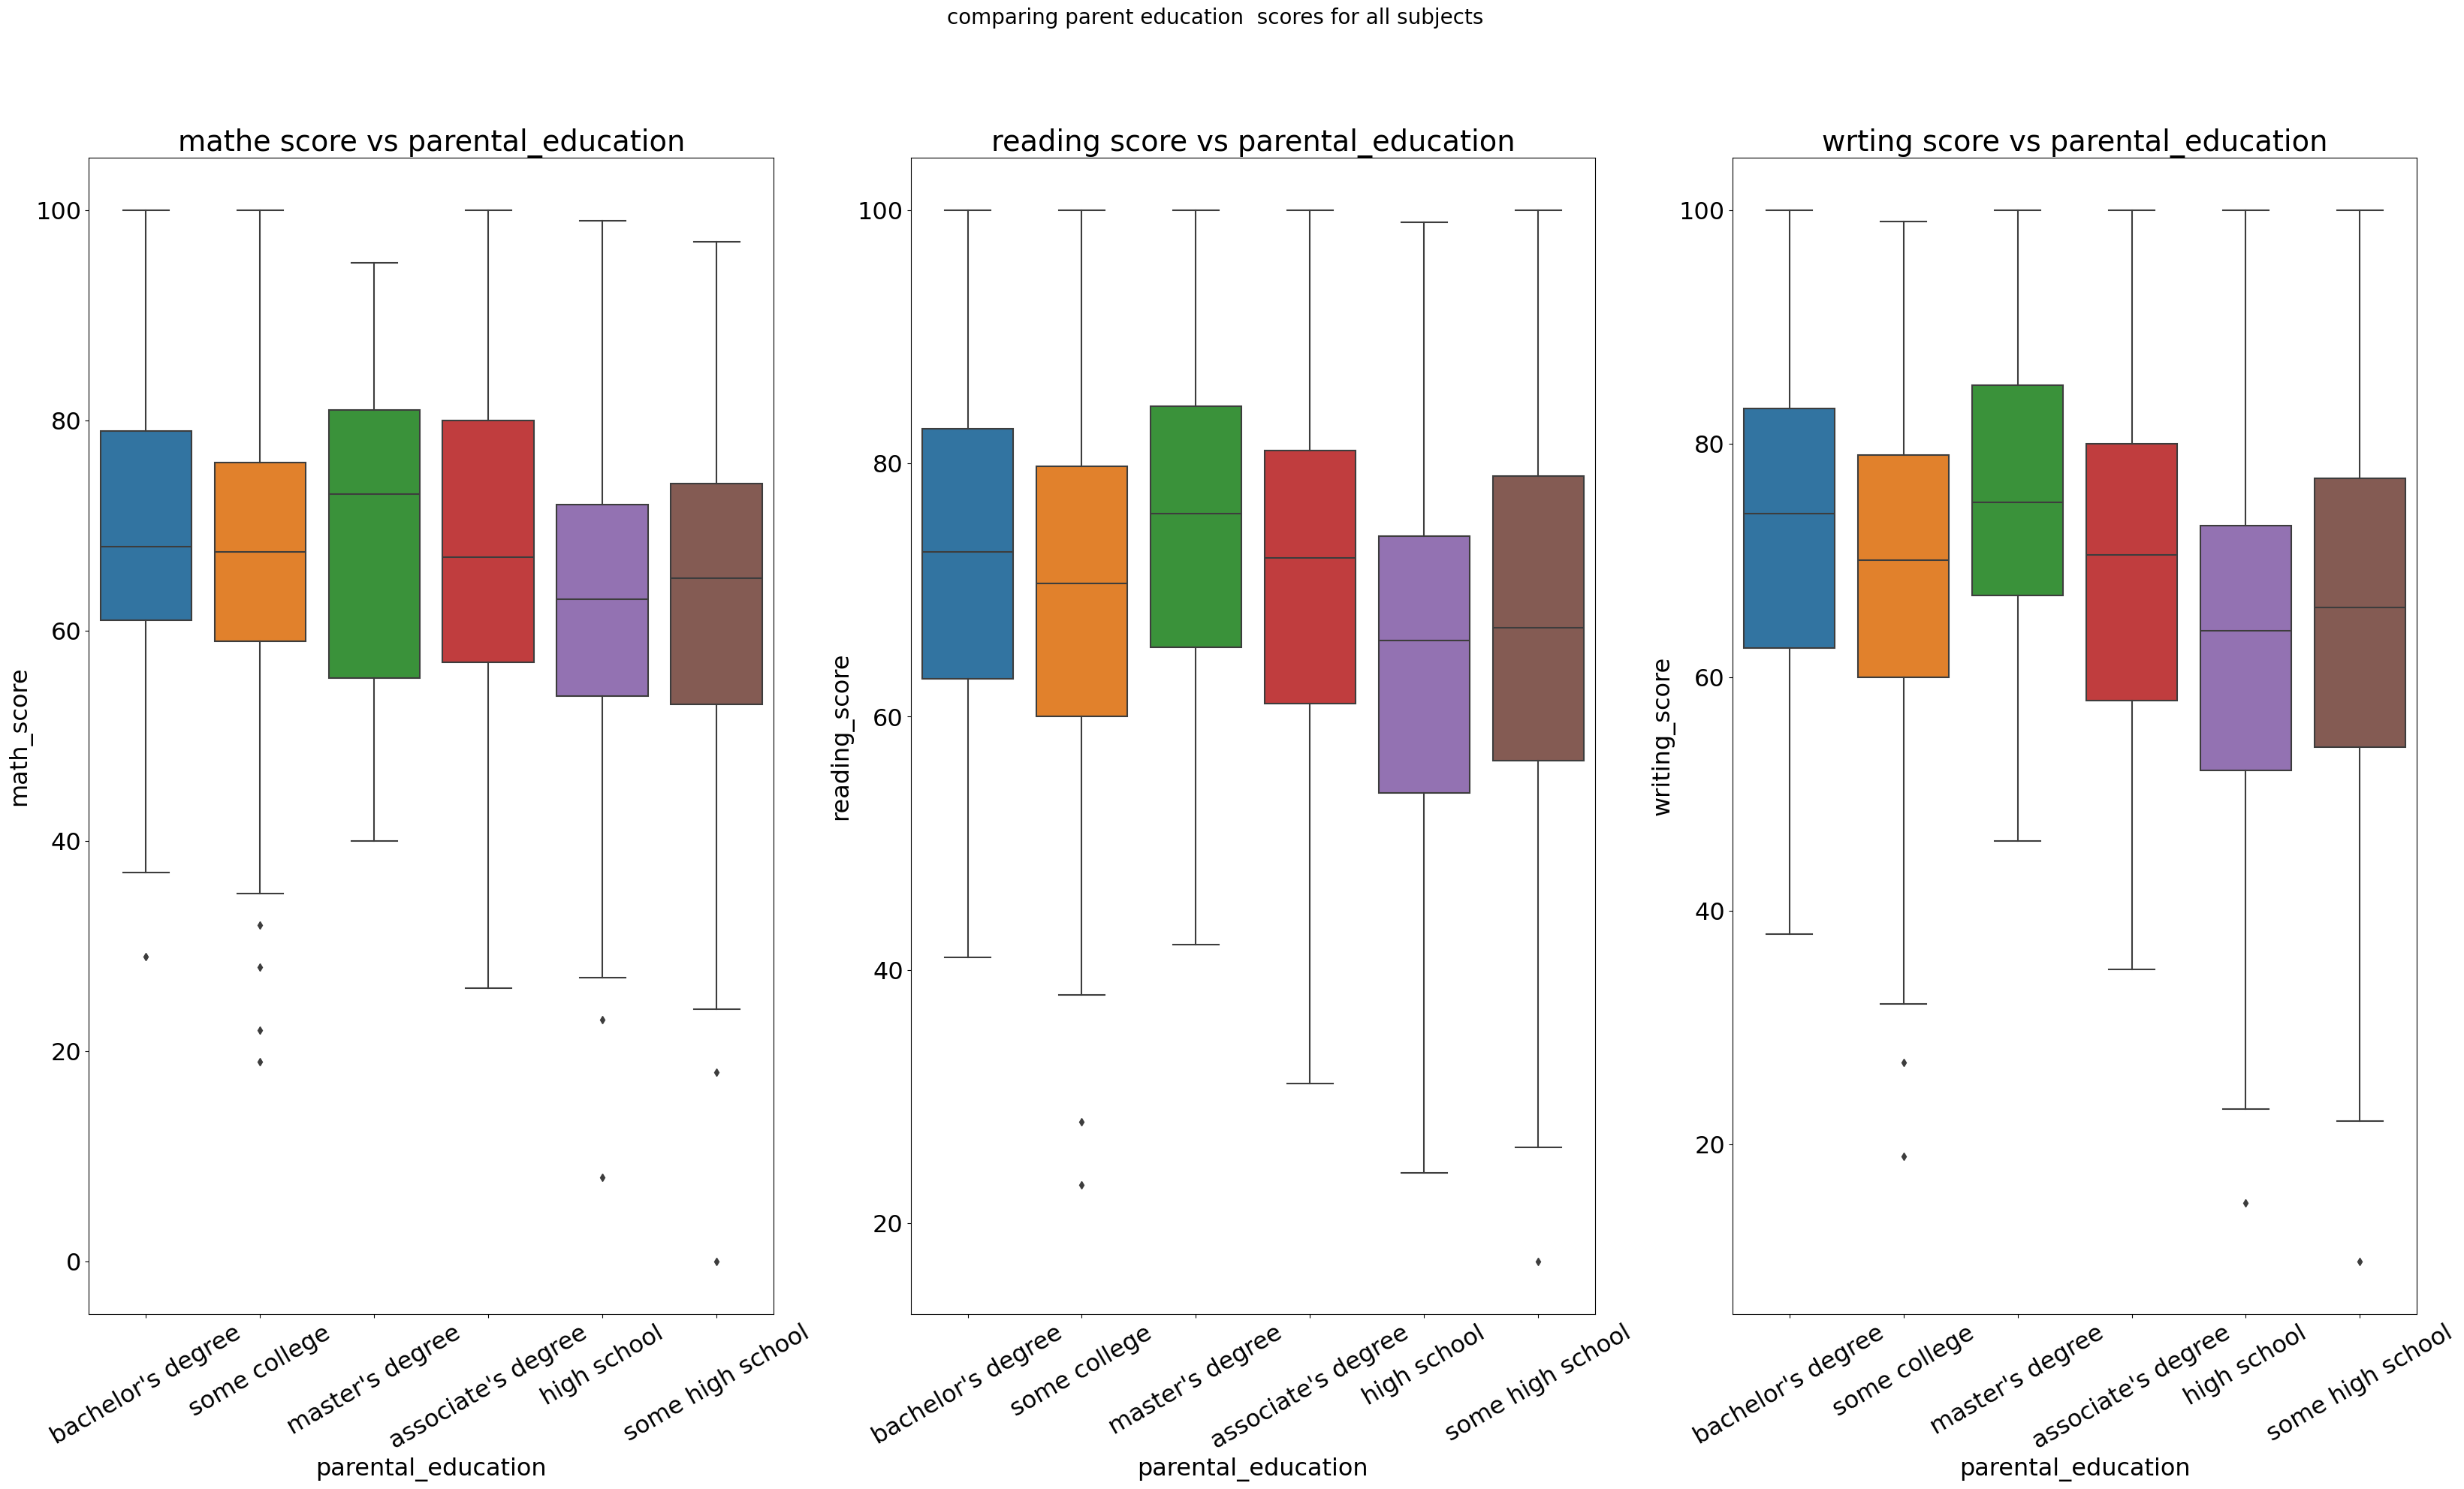

In [27]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
fig.suptitle("comparing parent education  scores for all subjects",fontsize=20)

#ax
sns.boxplot(x='parental_education',y='math_score',data=df,ax=ax1)
ax1.title.set_text('mathe score vs parental_education')
var1=ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)

sns.boxplot(x='parental_education',y='reading_score',data=df,ax=ax2)
ax2.title.set_text('reading score vs parental_education')
var2=ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)

sns.boxplot(x='parental_education',y='writing_score',data=df,ax=ax3)
ax3.title.set_text('wrting score vs parental_education')
var3=ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30)